In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import os
import os.path
from os import path
from matplotlib import pyplot
from google.colab import files

#Install pydrive to use file from google drive
!pip install PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

#Authenticate Google User
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
# ------------------------------- WEATHER DATA  ----------------------------- # 
#380 features, runtime 16 sek

#forecasts: (DAH Forecast, make sure synced correctly)
forecasts = drive.CreateFile({'id':"1Fabz0Hz7xSzLZwHFpPrSaxNw4cmPq0vn"})
forecasts.GetContentFile('forecasts.csv')
forecasts_data = pd.read_csv('forecasts.csv', header=0, index_col=0)

#dew_point: 44 nodes
dew_point = drive.CreateFile({'id':"16s5iiVDAlYtw-sAGBX-NgrLfAHluXE47"})
dew_point.GetContentFile('dew_point.csv')
dew_point_data = pd.read_csv('dew_point.csv', header=0, index_col=0)

#cloud_cover: 44 nodes (Klamath falls removed)
cloud_cover = drive.CreateFile({'id':"1d4UODNWWGB4jVHPgCPvykHNrZKFlobpe"})
cloud_cover.GetContentFile('cloud_cover.csv')
cloud_cover_data = pd.read_csv('cloud_cover.csv', header=0, index_col=0)
new_cloud_cover = cloud_cover_data.drop(['Klamath Falls Cloud Cover Forecast'], axis=1)

#precipitation_probability: 44 nodes (Klamath falls removed)
precipitation_probability = drive.CreateFile({'id':"1rTRAkEuFKRijcX5nDDpH7WallYsvxVXJ"})
precipitation_probability.GetContentFile('precipitation_probability.csv')
precipitation_probability_data = pd.read_csv('precipitation_probability.csv', header=0, index_col=0)
new_precipitation_probability= precipitation_probability_data.drop(['Klamath Falls Total Precipitation Forecast'], axis=1)

#temperature: 44 nodes (Klamath falls removed)
temperature = drive.CreateFile({'id':"1CVr_qGTq16Wu6k5anjeQKyV4g3haz88-"})
temperature.GetContentFile('temperature.csv')
temperature_data = pd.read_csv('temperature.csv', header=0, index_col=0)
new_temperature = temperature_data.drop(['Klamath Falls Temperature Forecast'], axis=1)

#total_precipitation: 44 nodes (Klamath falls removed)
total_precipitation = drive.CreateFile({'id':"1UOf2LKYs9uJIk4El773SWxYWIFUoxPtH"})
total_precipitation.GetContentFile('total_precipitation.csv')
total_precipitation_data = pd.read_csv('total_precipitation.csv', header=0, index_col=0)
new_total_precipitation = total_precipitation_data.drop(['Klamath Falls Total Precipitation Forecast'], axis=1)

#wind_gust: 44 nodes (Klamath falls removed)
wind_gust = drive.CreateFile({'id':"1VSASdXLySYgIZ7DR3P3Zq3CM7SKz5VQZ"})
wind_gust.GetContentFile('wind_gust.csv')
wind_gust_data = pd.read_csv('wind_gust.csv', header=0, index_col=0)
new_wind_gust = wind_gust_data.drop(['Klamath Falls Wind Gust Forecast'], axis=1)

#wind_speed: 44 nodes (Klamath falls removed)
wind_speed = drive.CreateFile({'id':"1a_3p14Dc-6RPPaoqHahjUzxbNv9APtd-"})
wind_speed.GetContentFile('wind_speed.csv')
wind_speed_data = pd.read_csv('wind_speed.csv', header=0, index_col=0)
new_wind_speed = wind_speed_data.drop(['Klamath Falls Wind Speed Forecast'], axis=1)

#relative_humidity: 44 nodes (Klamath falls removed)
relative_humidity = drive.CreateFile({'id':"16Wzl106R8pDexOgAa11XEjqXBaOpzlnr"})
relative_humidity.GetContentFile('relative_humidity.csv')
relative_humidity_data = pd.read_csv('relative_humidity.csv', header=0, index_col=0)
new_relative_humidity = relative_humidity_data.drop(['Klamath Falls Relative Humidity Forecast'], axis=1)

# ------------------------------- MERGING WEATHER DATA ----------------------------- 
#380 weather data features, Using merge function by setting how='left' (left-join) on column "hour"
#The pandas file with forecasts is always on the left, as it has all hours in range.

merge1 = pd.merge(forecasts_data, dew_point_data,
                   on='hour', 
                   how='left')

merge2 = pd.merge(merge1, new_cloud_cover,
                  on='hour', 
                   how='left')

merge3 = pd.merge(merge2, new_precipitation_probability,
                  on='hour', 
                   how='left')

merge4 =  pd.merge(merge3, new_temperature,
                   on='hour', 
                   how='left')

merge5 = pd.merge(merge4, new_total_precipitation,
                  on='hour', 
                   how='left')

merge6 = pd.merge(merge5, new_wind_gust,
                  on='hour', 
                   how='left')


merge7 = pd.merge(merge6, new_wind_speed,
                  on='hour', 
                   how='left')


merged_weather = pd.merge(merge7, new_relative_humidity,
                  on='hour', 
                   how='left')

merged_weather.head(5)

,CAISO-SP15 Wind Power Generation Forecast,CAISO Total Hydro Power Generation Forecast,CAISO Photovoltaic Power Generation Forecast,CAISO-AZPS Power Demand Forecast,CAISO-SDGE Power Demand Forecast,CAISO-NEVP Power Demand Forecast,CAISO Total Power Demand Forecast,CAISO-ZP26 Photovolataic Power Generation Forecast,CAISO Total Wind Power Generation Forecast,CAISO-PACE Power Demand Forecast,...,San Francisco Relative Humidity Forecast,San Jose Relative Humidity Forecast,San Luis Obispo Relative Humidity Forecast,Santa Rosa Relative Humidity Forecast,Stockton Relative Humidity Forecast,The Dalles Relative Humidity Forecast,Tucson Relative Humidity Forecast,Winnemuca Relative Humidity Forecast,Yreka Relative Humidity Forecast,Yuma Relative Humidity Forecast
hour,,,,,,,,,,,,,,,,,,,,,
2018-02-01 17:00:00,75.00.00,NaN,550.00.00,2950.00.00,2553.00.00,3869.00.00,26377.0,90.00.00,101.00.00,5807.00.00,...,92.0,93.0,76.0,99.0,90.0,92.0,23.0,69.0,87.0,29.0
2018-02-01 18:00:00,70.00.00,NaN,00.00,3199.00.00,2836.00.00,4216.00.00,28843.0,00.00,93.00.00,5930.00.00,...,90.0,87.0,62.0,97.0,84.0,89.0,19.0,59.0,83.0,23.0
2018-02-01 19:00:00,73.00.00,NaN,00.00,3159.00.00,2876.00.00,4247.00.00,29256.0,00.00,92.00.00,5927.00.00,...,83.0,76.0,52.0,93.0,77.0,86.0,14.0,49.0,77.0,18.0
2018-02-01 20:00:00,80.00.00,NaN,00.00,3086.00.00,2774.00.00,4185.00.00,28539.0,00.00,98.00.00,5872.00.00,...,76.0,69.0,42.0,86.0,71.0,81.0,12.0,43.0,69.0,15.0
2018-02-01 21:00:00,84.00.00,NaN,00.00,3033.00.00,2633.00.00,4089.00.00,27629.0,00.00,103.00.00,5680.00.00,...,65.0,62.0,35.0,77.0,67.0,77.0,11.0,40.0,61.0,14.0


In [2]:
# ------------------------------- GET MARKET DATA ----------------------------- # 
#- 3230 features, runtime 10 min

#ID of folder in Google Drive, where all csv files are orignally stored
fileList = drive.ListFile({'q': "'1Wi3xZHJEc8I7jExU8Am0dwokdxdgXxLV' in parents and trashed=false"}).GetList()
iterations = 0

print('Received %s files from Files.list()' % len(fileList)) #164 hours

#Loop over files in drive, and save them to session
for file in fileList:
  print('Title: %s, ID: %s' % (file['title'], file['id']))
  fileID = file['id']
  file_content = drive.CreateFile({'id': fileID})
  file_content.GetContentFile(file['title']+'.csv') 
  req_cols = ['OPR_DT','OPR_HR', 'NODE_ID','GROUP','PRC']
  CBNODE_data = pd.read_csv(file['title']+'.csv', header=0, usecols=req_cols,dtype={"GROUP": "int16", "PRC":"float16"}) # int64 can be reduced
  CBNODE_data.to_csv(index=False)
  CBNODE_data.info(verbose=False, memory_usage="deep") 
  CBNODE_data.dtypes
  
  #Count progress
  iterations = iterations + 1
  print(str(iterations) + " out of " + str(len(fileList)))
    
CBNODE_data.head(10)

Received 164 files from Files.list()
Title: 20220805_20220805_PRC_RTPD_LMP_RTPD_17_v1.csv, ID: 1n3LnfANBdox_ScZLxsdD73vMlXKO6Mj2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266624 entries, 0 to 266623
Columns: 5 entries, OPR_DT to GROUP
dtypes: float16(1), int16(1), int64(1), object(2)
memory usage: 38.5 MB
1 out of 164
Title: 20220805_20220805_PRC_RTPD_LMP_RTPD_05_v1.csv, ID: 1nVz7BI-erGhV7EYbaUbXLKY_C51-LGEV
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266624 entries, 0 to 266623
Columns: 5 entries, OPR_DT to GROUP
dtypes: float16(1), int16(1), int64(1), object(2)
memory usage: 38.5 MB
2 out of 164
Title: 20220805_20220805_PRC_RTPD_LMP_RTPD_04_v1.csv, ID: 1G8KwMW6KwzOHGM-znnnmmeekFtfVwhwe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266624 entries, 0 to 266623
Columns: 5 entries, OPR_DT to GROUP
dtypes: float16(1), int16(1), int64(1), object(2)
memory usage: 38.5 MB
3 out of 164
Title: 20220804_20220804_PRC_RTPD_LMP_RTPD_17_v1.csv, ID: 1ForH1jdSyPzPlHvIso_WSrZMpg2tome

,OPR_DT,OPR_HR,NODE_ID,PRC,GROUP
0,2022-07-31,23,0096WD_7_N001,118.687500,1
1,2022-07-31,23,0096WD_7_N001,105.562500,1
2,2022-07-31,23,0096WD_7_N001,102.812500,1
3,2022-07-31,23,0096WD_7_N001,89.937500,1
4,2022-07-31,23,0096WD_7_N001,4.671875,2


In [4]:
# -------------- CONVERGENCE BIDDING NODES ----------------- # 
#- 3230 features, runtime 3 minutes

#CBNODES - TRADEABLE NODES (subset of Pnodes from FMM data)
CBNODE = drive.CreateFile({'id':"1qPxMeuu8AULUpSPdeIrJ87UQctlK2JxP"})
CBNODE.GetContentFile('CBNODE.csv')
req_cols = ['NODE_ID']
CBNODE_data_true = pd.read_csv('CBNODE.csv', header=0, index_col=0,  usecols=req_cols) 

# -------------- READJUST AND REDUCE MARKET DATA ------------ # 

dir = './'
csvs_list = []
iterations = 0

for file in os.listdir(dir):
  if file.endswith("csv.csv"):
    
      #Getting Pnode data
      csv = pd.read_csv("./" + file, header=0, index_col=0) #Issue trying to reduce amount of columns, OPR_DT
      csv.info(verbose=False, memory_usage="deep") 
      csv.dtypes
      
      #Mergin PNodes to CBNodes only
      cb_csvs = pd.merge(CBNODE_data_true, csv, 
                    on='NODE_ID', #Change to NODE, so we don't neeed bot NODE_ID and NODE 
                    how='left')
      cb_csvs.info(verbose=False, memory_usage="deep") 
      cb_csvs.dtypes

      #CBnodes to list
      csvs_list.append(cb_csvs)  #Write feedback to console

      #Counter
      iterations = iterations + 1
      print("No. " + str(iterations) + " out of " + str(len(fileList)))
      
concat = pd.concat(csvs_list)  

#re-adjust the 'OPR_HR' and 'OPR_DT' into weather data's 'hour' format
concat.loc[concat["OPR_HR"] == 1, "OPR_HR"] = "07:00:00"
concat.loc[concat["OPR_HR"] == 2, "OPR_HR"] = "08:00:00"
concat.loc[concat["OPR_HR"] == 3, "OPR_HR"] = "09:00:00"
concat.loc[concat["OPR_HR"] == 4, "OPR_HR"] = "10:00:00"
concat.loc[concat["OPR_HR"] == 5, "OPR_HR"] = "11:00:00"
concat.loc[concat["OPR_HR"] == 6, "OPR_HR"] = "12:00:00"
concat.loc[concat["OPR_HR"] == 7, "OPR_HR"] = "13:00:00"
concat.loc[concat["OPR_HR"] == 8, "OPR_HR"] = "14:00:00"
concat.loc[concat["OPR_HR"] == 9, "OPR_HR"] = "15:00:00"
concat.loc[concat["OPR_HR"] == 10, "OPR_HR"] = "16:00:00"
concat.loc[concat["OPR_HR"] == 11, "OPR_HR"] = "17:00:00"
concat.loc[concat["OPR_HR"] == 12, "OPR_HR"] = "18:00:00"
concat.loc[concat["OPR_HR"] == 13, "OPR_HR"] = "19:00:00"
concat.loc[concat["OPR_HR"] == 14, "OPR_HR"] = "20:00:00"
concat.loc[concat["OPR_HR"] == 15, "OPR_HR"] = "21:00:00"
concat.loc[concat["OPR_HR"] == 16, "OPR_HR"] = "22:00:00"
concat.loc[concat["OPR_HR"] == 17, "OPR_HR"] = "23:00:00"
concat.loc[concat["OPR_HR"] == 18, "OPR_HR"] = "24:00:00"
concat.loc[concat["OPR_HR"] == 19, "OPR_HR"] = "01:00:00"
concat.loc[concat["OPR_HR"] == 20, "OPR_HR"] = "02:00:00"
concat.loc[concat["OPR_HR"] == 21, "OPR_HR"] = "03:00:00"
concat.loc[concat["OPR_HR"] == 22, "OPR_HR"] = "04:00:00"
concat.loc[concat["OPR_HR"] == 23, "OPR_HR"] = "05:00:00"
concat.loc[concat["OPR_HR"] == 24, "OPR_HR"] = "06:00:00"
concat['hour'] = concat["OPR_DT"].astype(str) + ' ' + concat["OPR_HR"].astype(str)# We can esentially remove the sepperate OPR_DT and OPR_HR after this one

#Group by group and hour, so we have and average price for each hour
mean_fmm = concat.groupby(['NODE_ID', 'hour', 'GROUP']).mean()

#Switch columns and rows.
clean_fmm = mean_fmm.pivot_table('PRC', ['hour'], 'NODE_ID')

clean_fmm.head(5)


<class 'pandas.core.frame.DataFrame'>
Index: 266624 entries, 2022-08-05T06:00:00-00:00 to 2022-08-05T06:45:00-00:00
Columns: 15 entries, INTERVALENDTIME_GMT to GROUP
dtypes: float64(1), int64(4), object(10)
memory usage: 205.9 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 51684 entries, 0 to 51683
Columns: 15 entries, NODE_ID to GROUP
dtypes: float64(5), object(10)
memory usage: 36.2 MB
No. 1 out of 164
<class 'pandas.core.frame.DataFrame'>
Index: 266588 entries, 2022-08-01T07:00:00-00:00 to 2022-08-01T07:45:00-00:00
Columns: 15 entries, INTERVALENDTIME_GMT to GROUP
dtypes: float64(1), int64(4), object(10)
memory usage: 205.9 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 51684 entries, 0 to 51683
Columns: 15 entries, NODE_ID to GROUP
dtypes: float64(5), object(10)
memory usage: 36.2 MB
No. 2 out of 164
<class 'pandas.core.frame.DataFrame'>
Index: 266624 entries, 2022-08-03T10:00:00-00:00 to 2022-08-03T10:45:00-00:00
Columns: 15 entries, INTERVALENDTIME_GMT to GROUP
dtypes

NODE_ID,0096WD_7_N001,0096WD_7_N002,2PBLSM34_7_N001,3EMIDIO_6_N001,3EMIDIO_6_N002,4C744C12_7_N002,4C744C32_7_N002,A100US_1_B1,ACTONSC_6_N001,AEC300_1_N001,...,ZACA_1_N001,ZAMORA_1_LN001,ZAMORA_1_N001,ZANJA_1_N003,ZANKER_1_N001,ZANKER_1_N003,ZENO_6_N001,ZENO_6_N002,ZEROWST_7_N002,ZONDWIND_6_N004
hour,,,,,,,,,,,,,,,,,,,,,
2022-07-31 01:00:00,89.894260,89.894260,72.930252,88.221429,88.221429,88.448429,88.439517,84.364417,75.454747,81.325829,...,128.839124,86.945118,86.945118,77.056286,86.636549,86.636549,87.098309,87.098309,85.276916,72.265089
2022-07-31 05:00:00,52.124309,52.124309,48.950929,51.532342,51.532342,51.876345,51.875018,48.639629,50.596123,48.334116,...,67.992644,48.115638,48.115638,51.328310,49.711976,49.711976,49.922027,49.922027,49.218323,48.648486
2022-07-31 06:00:00,42.837119,42.837119,40.741768,42.360241,42.360241,42.649603,42.646551,41.196598,41.885097,40.828560,...,49.607641,40.867510,40.867510,42.286239,41.992679,41.992679,42.037749,42.037749,41.341643,40.594024
2022-08-01 01:00:00,39.227804,39.227804,60.504199,31.476375,31.476375,36.944519,36.924157,49.743536,59.911276,38.933364,...,38.593443,49.912687,49.912687,61.437227,54.919341,54.919341,52.909739,52.909739,59.057433,55.566371
2022-08-01 02:00:00,45.805111,45.805111,75.614991,45.566440,45.566440,45.610110,45.607001,50.318182,75.063076,47.115297,...,47.791963,54.399369,54.399369,76.180792,52.573741,52.573741,52.850153,52.850153,53.537821,69.192820


In [8]:
total_merge = pd.merge(clean_fmm, merged_weather,
                  on='hour', 
                   how='left')

total_merge.to_csv('merged_features.csv')
total_merge.head(10)

#total_merge.sort_values(by=['hour'])
#total_merge.iloc[0:6]

,0096WD_7_N001,0096WD_7_N002,2PBLSM34_7_N001,3EMIDIO_6_N001,3EMIDIO_6_N002,4C744C12_7_N002,4C744C32_7_N002,A100US_1_B1,ACTONSC_6_N001,AEC300_1_N001,...,San Francisco Relative Humidity Forecast,San Jose Relative Humidity Forecast,San Luis Obispo Relative Humidity Forecast,Santa Rosa Relative Humidity Forecast,Stockton Relative Humidity Forecast,The Dalles Relative Humidity Forecast,Tucson Relative Humidity Forecast,Winnemuca Relative Humidity Forecast,Yreka Relative Humidity Forecast,Yuma Relative Humidity Forecast
hour,,,,,,,,,,,,,,,,,,,,,
2022-07-31 01:00:00,89.894260,89.894260,72.930252,88.221429,88.221429,88.448429,88.439517,84.364417,75.454747,81.325829,...,84.0,57.0,55.0,53.0,38.0,15.0,49.0,7.0,15.0,30.0
2022-07-31 05:00:00,52.124309,52.124309,48.950929,51.532342,51.532342,51.876345,51.875018,48.639629,50.596123,48.334116,...,93.0,76.0,87.0,88.0,50.0,30.0,60.0,12.0,25.0,40.0
2022-07-31 06:00:00,42.837119,42.837119,40.741768,42.360241,42.360241,42.649603,42.646551,41.196598,41.885097,40.828560,...,93.0,80.0,90.0,95.0,55.0,33.0,61.0,15.0,28.0,42.0
2022-08-01 01:00:00,39.227804,39.227804,60.504199,31.476375,31.476375,36.944519,36.924157,49.743536,59.911276,38.933364,...,82.0,52.0,54.0,52.0,39.0,18.0,48.0,14.0,23.0,32.0
2022-08-01 02:00:00,45.805111,45.805111,75.614991,45.566440,45.566440,45.610110,45.607001,50.318182,75.063076,47.115297,...,84.0,54.0,59.0,56.0,39.0,21.0,51.0,15.0,26.0,33.0
2022-08-01 03:00:00,53.310858,53.310858,57.062601,53.047929,53.047929,53.292031,53.292031,52.158409,59.169270,51.259344,...,86.0,58.0,68.0,62.0,41.0,25.0,55.0,17.0,29.0,35.0
2022-08-01 04:00:00,51.499060,51.499060,53.262449,51.299755,51.299755,51.450500,51.457662,46.795564,54.924463,45.999398,...,88.0,63.0,78.0,71.0,43.0,29.0,58.0,20.0,32.0,38.0
2022-08-01 05:00:00,49.980528,49.980528,51.204707,49.622422,49.622422,49.945475,49.943303,45.107278,52.632431,44.530751,...,90.0,70.0,84.0,82.0,46.0,33.0,60.0,26.0,34.0,40.0
2022-08-01 06:00:00,46.185646,46.185646,40.566220,46.073933,46.073933,46.189421,46.188463,39.412183,41.853738,38.688482,...,91.0,74.0,87.0,88.0,49.0,36.0,61.0,32.0,36.0,42.0


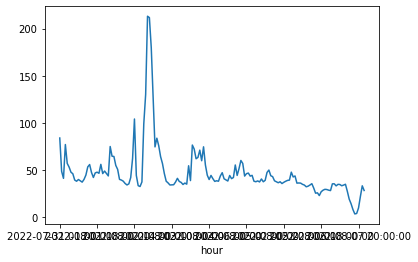

In [9]:
#show node graph
total_merge["AMESBS_1_N101"].plot()
pyplot.show()
